In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import math

In [2]:
data=pd.read_excel('torbat_data.xls')
data=pd.DataFrame(data).drop(columns='Date')
extra_columns=[]
#data2=data.drop(columns=extra_columns)

In [3]:
data

,Days,pH,DO,NH4-N,COD,BOD,MLSS,MLVSS,TN
0,1,7.410,1.560000,93.940,1030.4,395.2,436.48,292.4416,107.95
1,2,7.296,1.536000,68.320,996.8,369.2,523.28,350.5976,87.63
2,3,7.315,1.540000,76.860,1030.4,611.0,508.40,340.6280,100.33
3,4,7.391,1.556000,75.640,1030.4,512.2,523.28,350.5976,95.25
4,5,7.315,1.540000,86.620,1444.8,585.0,719.20,481.8640,102.87
...,...,...,...,...,...,...,...,...,...
827,828,7.315,1.283333,50.264,1187.2,504.4,669.60,401.7600,73.66
828,829,7.315,1.283333,84.180,1344.0,579.8,793.60,476.1600,101.60
829,830,7.315,1.283333,56.852,1041.6,555.1,500.96,300.5760,71.12
830,831,7.315,1.283333,61.854,1209.6,581.1,585.28,351.1680,81.28


In [4]:
scaler = MinMaxScaler()
scaler.fit(data)
normData = pd.DataFrame(scaler.transform(data.values), index=data.index, columns=data.columns)

In [5]:
data.columns

Index(['Days', 'pH', 'DO', 'NH4-N', 'COD', 'BOD', 'MLSS', 'MLVSS', 'TN'], dtype='object')

import matplotlib
matplotlib.rcParams.update({'font.size': 15})

fig, ax1 = plt.subplots(figsize=(20,4))
figure=plt.plot(data['Days'],normData['TN'], color = 'c', label = 'DataSet')
plt.xlabel("Time (Day)")
plt.ylabel("TN")

plt.plot()


plt.plot(normData['Week'],normData['TN'])
plt.xlabel("Time")
plt.ylabel("TN")

plt.plot(normData['Week'],normData['PO4'])
plt.xlabel("Time")
plt.ylabel("PO4")

In [6]:
normData.columns

Index(['Days', 'pH', 'DO', 'NH4-N', 'COD', 'BOD', 'MLSS', 'MLVSS', 'TN'], dtype='object')

In [7]:
extra_columns2=['Days', 'pH', 'MLSS', 'MLVSS', 'TN']
x=normData.drop(columns=extra_columns2)
y=normData['TN']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state = 0)

In [8]:
x_train.head()

,DO,NH4-N,COD,BOD
676,0.181488,0.784173,0.593195,0.685259
251,0.508992,0.730216,0.363905,0.557769
210,0.090744,0.730216,0.482249,0.527888
715,0.140653,0.410072,0.408284,0.247012
478,0.181488,0.530576,0.667160,0.462151


In [9]:
# Nh = Ns/(α∗ (Ni + No))

Ni = number of input neurons.
No = number of output neurons.
Ns = number of samples in training data set.
α = an arbitrary scaling factor usually 2-10.

# ANN

In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [11]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(4, activation = 'relu', input_dim = 4))

# Adding the second hidden layer
model.add(Dense(units = 20, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 10, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

In [38]:
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae','mape'])
history = model.fit(x[:800], y[:800] , epochs=150)


TypeError: Invalid keyword argument(s) in `compile`: {'lr'}

In [13]:
y_pred_ANN = model.predict(x)
y_pred_ANN =y_pred_ANN.reshape(y_pred_ANN.size)


In [14]:
y_pred_ANN.shape

(832,)

# Random Forest Regression

In [15]:
from sklearn.ensemble import RandomForestRegressor
regressior= RandomForestRegressor(bootstrap=True,max_depth= 70, max_features='auto'
                                  ,min_samples_leaf= 4,min_samples_split= 10,n_estimators= 400)


In [16]:
regressior.fit(x[:800],y[:800])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=70, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [17]:
y_pred_RF= regressior.predict(x)

In [18]:
y_pred_RF.shape

(832,)

# Gradient Boosting Machine

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor(n_estimators=10000,learning_rate=0.001,min_samples_split=200,min_samples_leaf=40
                            ,max_depth = 6,subsample = 0.8)

In [20]:
GB.fit(x[:800],y[:800])

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.001, loss='ls',
                          max_depth=6, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=40, min_samples_split=200,
                          min_weight_fraction_leaf=0.0, n_estimators=10000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
y_pred_GBM=GB.predict(x)

In [22]:
def RMSE (y_true, y_pred):
    rmse = math.sqrt((np.square( np.subtract(y_pred , y_true) ).sum())/y_pred.size)
    return rmse

In [23]:
def MSE (y_true, y_pred):
    mse = (np.square( np.subtract(y_pred , y_true) ).sum())/y_pred.size
    return mse

In [24]:
def MAE (y_true, y_pred):
    mae=(np.subtract(y_pred , y_true).sum())/y_pred.size
    return mae

In [25]:
def R2(y_true, y_pred):
    """
    Calculation of the unadjusted r-squared, goodness of fit metric
    """
    sse  = np.square( y_pred - y_true ).sum()
    sst  = np.square( y_true - y_true.mean() ).sum()
    return 1 - sse/sst

# Metric For Validation

In [26]:
print ('R2_ANN= ',R2(y, y_pred_ANN) ,'R2_RF= ',R2(y, y_pred_RF) , 'R2_GBM= ',R2(y, y_pred_GBM) )

R2_ANN=  0.7033017631190461 R2_RF=  0.8307790581744656 R2_GBM=  0.7566809444254746


In [27]:
#print ('MSE_ANN= ',MSE(y, y_pred_ANN) ,'MSE_RF= ',MSE(y, y_pred_RF) , 'MSE_GBM= ',MSE(y, y_pred_GBM) )

In [28]:
print ('MAE_ANN= ',MAE(y, y_pred_ANN) ,'MAE_RF= ',MAE(y, y_pred_RF) , 'MAE_GBM= ',MAE(y, y_pred_GBM) )

MAE_ANN=  -0.007225022814633686 MAE_RF=  0.0007500173146244419 MAE_GBM=  0.0007379884089102908


In [29]:
print ('RMSE_ANN= ',RMSE(y, y_pred_ANN) ,'RMSE_RF= ',RMSE(y, y_pred_RF) , 'RMSE_GBM= ',RMSE(y, y_pred_GBM) )

RMSE_ANN=  0.07393893809673195 RMSE_RF=  0.0558396619133817 RMSE_GBM=  0.0669582026253317


# Metric For Test

In [30]:
print ('R2_ANN= ',R2(y[800:], y_pred_ANN[800:]) ,'R2_RF= ',R2(y[800:], y_pred_RF[800:]) 
       , 'R2_GBM= ',R2(y[800:], y_pred_GBM[800:]) )

R2_ANN=  0.570327659490655 R2_RF=  0.5286739420582984 R2_GBM=  0.5394303358449353


In [31]:
print ('MAE_ANN= ',MAE(y[800:], y_pred_ANN[800:]) ,'MAE_RF= ',MAE(y[800:], y_pred_RF[800:]) 
       , 'MAE_GBM= ',MAE(y[800:], y_pred_GBM[800:]) )

MAE_ANN=  0.02082334986577438 MAE_RF=  0.01940408403973184 MAE_GBM=  0.01856056186916849


In [32]:
print ('RMSE_ANN= ',RMSE(y[800:], y_pred_ANN[800:]) ,'RMSE_RF= ',RMSE(y[800:], y_pred_RF[800:]) 
       , 'RMSE_GBM= ',RMSE(y[800:], y_pred_GBM[800:]) )

RMSE_ANN=  0.09043189495928185 RMSE_RF=  0.0947138865546921 RMSE_GBM=  0.09362688991423535


# Rescaling to Normal values

In [33]:
def Rescalig(pred):
    normData2=normData.drop(columns='TN')
    y_pred_column=pd.DataFrame(pred, columns=['TN_Pred'])
    normData3=pd.concat([normData2,y_pred_column],axis=1)
    rescaled=pd.DataFrame(scaler.inverse_transform(normData3.values), index=normData3.index, columns=normData3.columns)
    return rescaled['TN_Pred']

In [34]:
res_y=Rescalig(y)
res_y_pred_ANN=Rescalig(y_pred_ANN)
res_y_pred_RF=Rescalig(y_pred_RF)
res_y_pred_GBM=Rescalig(y_pred_GBM)


# plot metrics
plt.plot(history.history['mse'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()


plt.plot(history.history['mae'])
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.show()

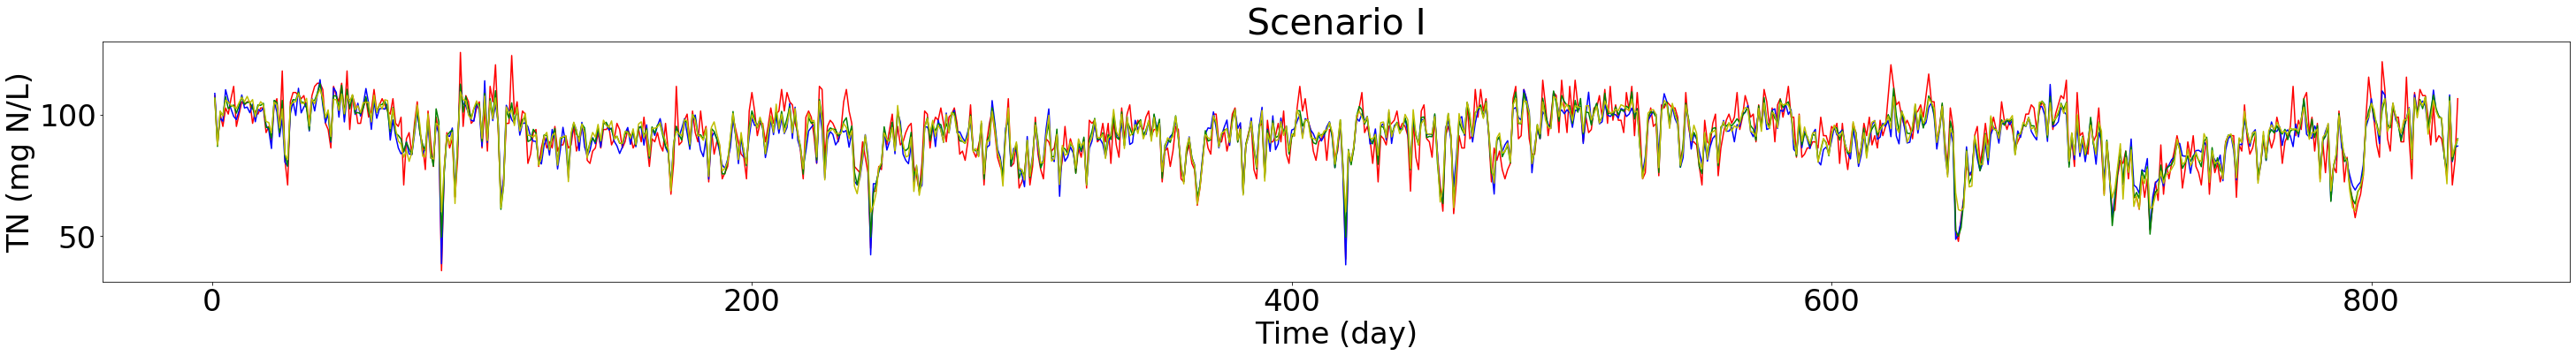

In [35]:
y_pred = model.predict(x)
plt.rcParams.update({'font.size': 34})
time=data['Days']
fig, ax1 = plt.subplots(figsize=(50,5))
plt.plot(time,data['TN'], color = 'red', label = 'Real data')
plt.plot(time,res_y_pred_ANN, color = 'blue', label = 'Predicted by ANN')
plt.plot(time,res_y_pred_RF, color = 'green', label = 'Predicted by RF')
plt.plot(time,res_y_pred_GBM, color = 'y', label = 'Predicted by GB')
plt.xlabel("Time (day)")
plt.ylabel("TN (mg N/L)")
plt.title('Scenario I')
#plt.legend()
plt.savefig('Scenario I.png')
plt.show()


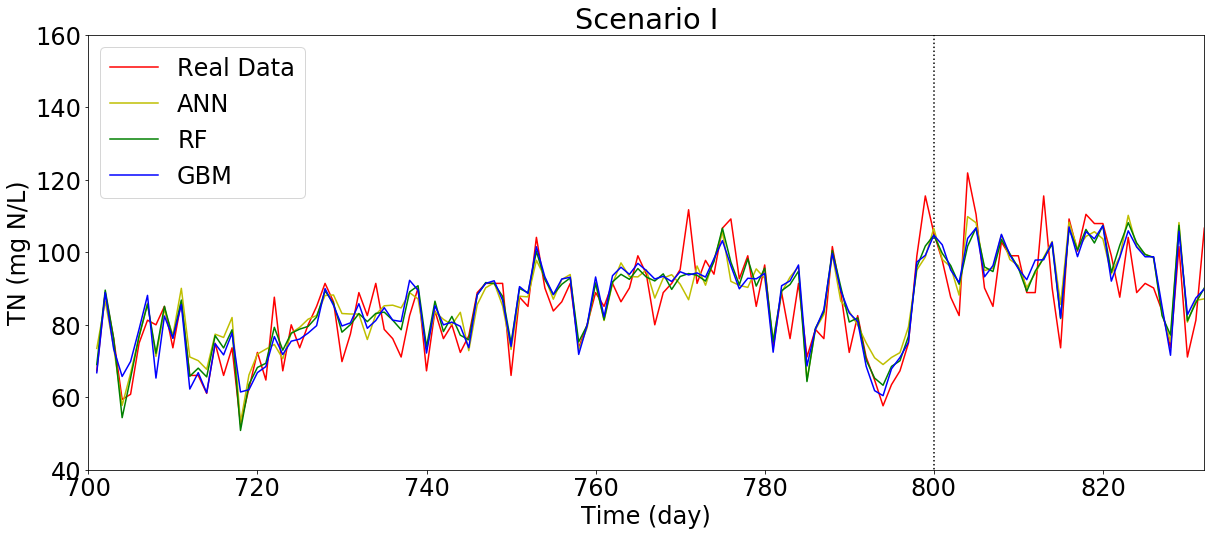

In [36]:
y_pred = model.predict(x)

time=data['Days'][700:]
plt.rcParams.update({'font.size': 24})
fig, ax1 = plt.subplots(figsize=(20,8), )


plt.xlim(700,832), plt.ylim(40, 160)
plt.plot([800,800],[0,500],  linestyle=':',color = 'k')
plt.plot(time,data['TN'][700:], color = 'red', label = 'Real Data')
plt.plot(time,res_y_pred_ANN[700:], color = 'y', label = 'ANN')
plt.plot(time,res_y_pred_RF[700:], color = 'green', label = 'RF')
plt.plot(time,res_y_pred_GBM[700:], color = 'b', label = 'GBM')

plt.xlabel("Time (day)")
plt.ylabel("TN (mg N/L)")
plt.title('Scenario I')

plt.legend(loc='upper left')
plt.savefig('zoom-Scenario I.png')
plt.show()
